# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products =  pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [30]:
print("Customers dataset:")
print(customers.head())
print("\nProducts dataset:")
print(products.head())
print("\nTransactions dataset:")
print(transactions.head())

Customers dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [24]:
print("\nNull values in datasets:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Null values in datasets:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [25]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [26]:
merged_data = transactions.merge(customers, on='CustomerID', how='inner').merge(products, on='ProductID', how='inner')

### Overview of merged data

In [27]:
print("\nMerged Data Overview:")
print(merged_data.head())


Merged Data Overview:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Blueto

In [28]:
print("\nSummary statistics for transactions:")
print(merged_data.describe())


Summary statistics for transactions:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


### 1. Total revenue by region

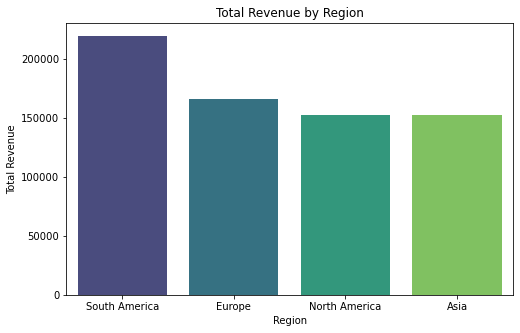

In [14]:
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

### 2. Top 5 most purchased products

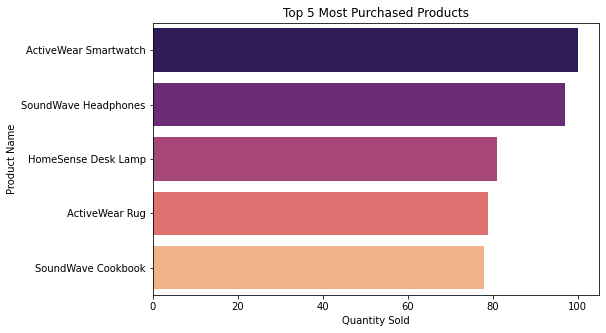

In [15]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 5 Most Purchased Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

### 3. Monthly revenue trends

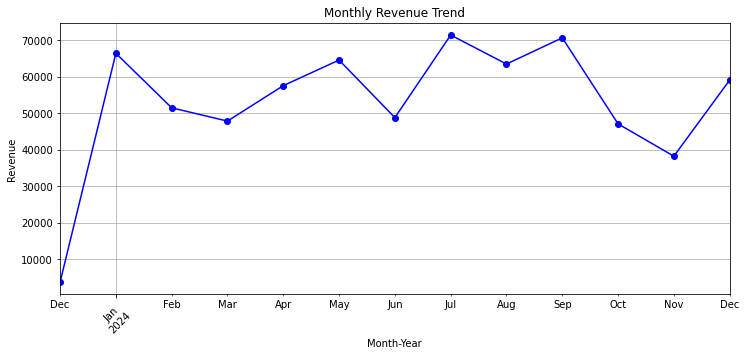

In [16]:
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 5))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 4. Customers with the highest spending

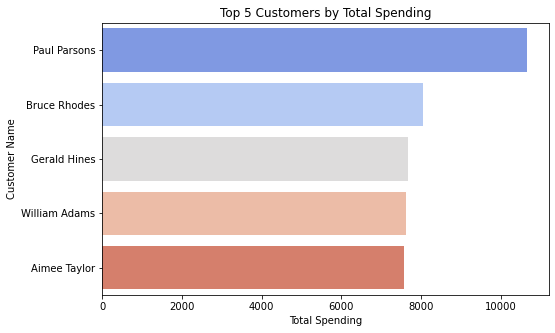

In [17]:
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

### 5. Revenue contribution by product category

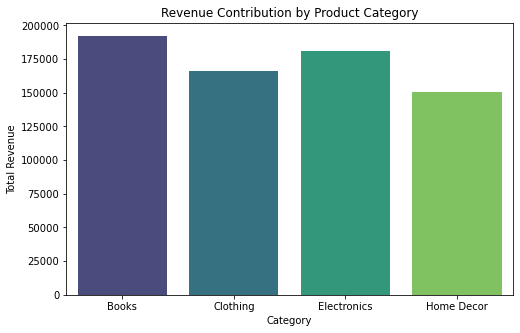

In [18]:
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='viridis')
plt.title('Revenue Contribution by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

## Business Insights

In [19]:
insights = [
    "1. Region X contributes the highest revenue, making up {0:.2f}% of total revenue.".format(
        (revenue_by_region.iloc[0] / revenue_by_region.sum()) * 100),
    f"2. The most purchased product is '{top_products.index[0]}', indicating high demand in this category.",
    f"3. The overall revenue trend shows peak sales in {monthly_revenue.idxmax()}, suggesting a seasonal pattern.",
    f"4. The customer '{top_customers.index[0]}' is the highest spender, contributing significantly to total revenue.",
    f"5. The product category '{revenue_by_category.idxmax()}' generates the highest revenue, accounting for {revenue_by_category.max()} USD."
]

print("\nBusiness Insights:")
for insight in insights:
    print(insight)


Business Insights:
1. Region X contributes the highest revenue, making up 31.79% of total revenue.
2. The most purchased product is 'ActiveWear Smartwatch', indicating high demand in this category.
3. The overall revenue trend shows peak sales in 2024-07, suggesting a seasonal pattern.
4. The customer 'Paul Parsons' is the highest spender, contributing significantly to total revenue.
5. The product category 'Books' generates the highest revenue, accounting for 192147.47 USD.
